In [2]:
#tensorいじりのテストを行う
import torch
import torch.nn
x = torch.randn(10,10,10)
torch.cuda.is_available()

True

In [3]:
def UpSampling1D(input):
    repeats = [1 for _ in range(len(input.shape))]
    repeats[1] = 2
    return input.repeat(*repeats)

In [4]:
UpSampling1D(x).shape

torch.Size([10, 20, 10])

In [5]:
from audio_to_multiple_pose_gan.dataset import load_train, generate_batch, get_processor
from audio_to_multiple_pose_gan.config import get_config

2023-10-18 15:30:44.969426: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-18 15:30:45.001634: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-18 15:30:45.171397: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-18 15:30:45.171461: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-18 15:30:45.172397: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [6]:
!ls

README.md		    common	      requirments.txt
audio_to_multiple_pose_gan  data	      speech2gesture
cmd.txt			    requirements.txt  tensortest.ipynb


In [7]:
import pandas as pd
from common.consts import AUDIO_SHAPE
batch_size = 32
train_csv: str = "~/Desktop/AI-Experiments/Gestures/train.csv"
#df = pd.read_csv(self.args.train_csv)
#cfg = get_config(self.args.config)
df = pd.read_csv(train_csv)
#cfg = get_config(config)
cfg: dict = {"processor": "audio_to_pose", "input_shape": [None, AUDIO_SHAPE]}
process_row, decode_pose = get_processor(cfg)
train_generator, num_samples_train = load_train(process_row, batch_size, df, generate_batch, workers=8 ,max_queue_size=32)

In [8]:
from common.consts import AUDIO_SHAPE
configs = {
    "audio_to_pose": {"num_keypoints": 98, "processor": "audio_to_pose", "flatten": False, "input_shape": [None, AUDIO_SHAPE]},
    "audio_to_pose_inference": {"num_keypoints": 98, "processor": "audio_to_pose_inference", "flatten": False, "input_shape": [None, AUDIO_SHAPE]}
}
cfg: dict = {"processor": "audio_to_pose", "input_shape": [None, AUDIO_SHAPE]}
process_row, decode_pose = get_processor(cfg)

In [9]:
row = df.sample(n=1).iloc[0]

In [10]:
process_row(row)

(array([ 0.0857432 ,  0.06959059,  0.05380889, ..., -0.13307016,
        -0.17567194, -0.1759803 ], dtype=float32),
 array([[ 0.        , -1.17790806,  0.47608496, ...,  0.99890156,
          1.0486113 ,  0.9934272 ],
        [ 0.        , -1.17790806,  0.47608496, ...,  0.99890156,
          1.03278918,  0.9934272 ],
        [ 0.        , -1.17790806,  0.53136654, ...,  0.9665919 ,
          1.0486113 ,  0.91562849],
        ...,
        [ 0.        , -0.84294202, -0.29785715, ...,  1.40277229,
          1.03278918,  0.97786746],
        [ 0.        , -0.67545901, -0.24257557, ...,  1.37046264,
          1.03278918,  1.00898694],
        [ 0.        , -0.67545901, -0.24257557, ...,  1.45123678,
          1.42834229,  1.41354019]]))

In [11]:
X, Y = generate_batch(df, process_row, batch_size)

In [12]:
X.shape

(32, 67267)

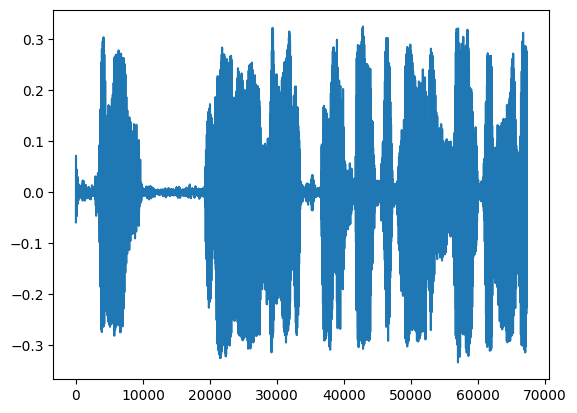

In [13]:
import matplotlib.pyplot as plt
plt.plot(X[0])
plt.show()

In [20]:
X

array([[ 0.00720311,  0.00337859,  0.00044018, ..., -0.14350942,
        -0.15190938, -0.15943381],
       [ 0.00666435,  0.006397  ,  0.00506765, ..., -0.00036755,
        -0.00028388, -0.00026738],
       [-0.13219145, -0.13803767, -0.14654598, ..., -0.00659886,
        -0.00527737, -0.00435241],
       ...,
       [-0.00850831, -0.00792165, -0.00813255, ..., -0.0027716 ,
        -0.00235408, -0.00204493],
       [ 0.03801936,  0.04189539,  0.04844862, ..., -0.00642193,
        -0.00577461, -0.00600735],
       [ 0.00247608,  0.00258865,  0.00215992, ...,  0.02363978,
         0.02654152,  0.03548853]], dtype=float32)

In [145]:
X.shape

(32, 67267)

In [21]:
import tensorflow as tf
import numpy as np

noise = np.random.rand(32,28,28,3)
tf.image.resize(noise, (64,1), method = tf.image.ResizeMethod.BILINEAR)

2023-10-17 17:19:16.463674: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-17 17:19:16.464727: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


<tf.Tensor: shape=(32, 64, 1, 3), dtype=float32, numpy=
array([[[[0.18551928, 0.4884659 , 0.89902973]],

        [[0.22047102, 0.4907194 , 0.78779775]],

        [[0.3183359 , 0.4970292 , 0.4763482 ]],

        ...,

        [[0.4103999 , 0.34626812, 0.7491024 ]],

        [[0.59468997, 0.42685658, 0.741889  ]],

        [[0.6605078 , 0.45563817, 0.73931277]]],


       [[[0.20520805, 0.43555844, 0.56485736]],

        [[0.22025362, 0.4447296 , 0.5291838 ]],

        [[0.2623812 , 0.47040883, 0.42929775]],

        ...,

        [[0.37908548, 0.8776263 , 0.30896452]],

        [[0.5297905 , 0.90128344, 0.44761425]],

        [[0.58361375, 0.90973246, 0.497132  ]]],


       [[[0.5474897 , 0.66156626, 0.5596739 ]],

        [[0.5478985 , 0.63382375, 0.5457147 ]],

        [[0.54904294, 0.55614465, 0.5066288 ]],

        ...,

        [[0.45677784, 0.42228633, 0.6088985 ]],

        [[0.43707561, 0.5970459 , 0.6208307 ]],

        [[0.4300391 , 0.65946007, 0.6250922 ]]],


       ...,




In [25]:
from torchvision import transforms
from torchvision.transforms import InterpolationMode
resize = transforms.Resize((64,1), InterpolationMode.BILINEAR, antialias=True)

In [26]:
x = torch.randn(32,3,28,28)
resize(x).shape

torch.Size([32, 3, 64, 1])

In [55]:
import functools
import tensorflow as tf


def tf_mel_spectograms(x_audio):
    stft = tf.signal.stft(
        x_audio,
        400,
        160,
        fft_length=512,
        window_fn=functools.partial(tf.signal.hann_window, periodic=True),
        pad_end=False,
        name=None
    )
    print(stft.get_shape())
    stft = tf.abs(stft)
    print(stft.get_shape())
    mel_spect_input = tf.signal.linear_to_mel_weight_matrix(
        num_mel_bins=64,
        num_spectrogram_bins=tf.shape(stft)[2],
        sample_rate=16000,
        lower_edge_hertz=125.0,
        upper_edge_hertz=7500.0,
        dtype=tf.float32,
        name=None
    )
    print(mel_spect_input.shape)
    input_data = tf.tensordot(stft, mel_spect_input, 1)
    input_data = tf.math.log(input_data + 1e-6)
    input_data = tf.expand_dims(input_data, -1)
    return input_data

In [56]:
tf_mel_spectograms(X)

(32, 418, 257)
(32, 418, 257)
(257, 64)


<tf.Tensor: shape=(32, 418, 64, 1), dtype=float32, numpy=
array([[[[-0.00744491],
         [-1.4908255 ],
         [-0.2683074 ],
         ...,
         [-3.3259177 ],
         [-2.7499185 ],
         [-2.9428968 ]],

        [[-0.52171344],
         [-1.4583683 ],
         [-0.98553556],
         ...,
         [-3.9075015 ],
         [-3.4354675 ],
         [-3.3433964 ]],

        [[-1.412768  ],
         [-1.4532514 ],
         [-2.214619  ],
         ...,
         [-4.310933  ],
         [-4.648402  ],
         [-4.790809  ]],

        ...,

        [[ 1.1879959 ],
         [ 0.627062  ],
         [-1.1588726 ],
         ...,
         [-1.050248  ],
         [-0.92550856],
         [-0.85559607]],

        [[ 0.94825816],
         [ 0.49553174],
         [-0.8121458 ],
         ...,
         [-0.51040626],
         [-0.3865007 ],
         [-0.45385313]],

        [[ 0.8995026 ],
         [ 0.11460755],
         [-1.1058495 ],
         ...,
         [-1.3136654 ],
         [-0.71459

In [73]:
from einops import rearrange
import librosa
def torch_mel_spectograms(X_audio):
    if not isinstance(X_audio, torch.Tensor):
        X_audio = torch.tensor(X_audio)
    n_fft = 512
    win_length = 400
    hop_length = 160
    stft = torch.stft(X_audio, window=torch.hann_window(window_length=win_length), win_length = win_length, n_fft=n_fft, return_complex=True, hop_length=hop_length, center=False)
    stft = torch.abs(stft)
    stft = rearrange(stft, "a b c->a c b")
    
    return stft

In [69]:
torch.stft(torch.tensor(X), window=torch.hann_window(window_length=400),n_fft=512, return_complex=True, win_length = 400, hop_length=160, center=False).shape

torch.Size([32, 257, 418])

In [72]:
torch_mel_spectograms(X)

tensor([[[1.0409e-01, 8.9491e-02, 3.7756e-01,  ..., 1.0699e-06,
          1.6049e-07, 1.4901e-07],
         [1.5325e-01, 1.5362e-01, 4.2988e-01,  ..., 1.3959e-06,
          5.1155e-07, 2.3842e-07],
         [2.9549e-01, 3.2930e-01, 2.4565e-01,  ..., 6.7076e-07,
          2.2152e-07, 2.9802e-08],
         ...,
         [2.6863e-01, 3.0610e-01, 3.2170e-01,  ..., 9.7504e-06,
          2.4006e-05, 7.5996e-06],
         [3.7492e-01, 2.2656e-01, 1.6966e-01,  ..., 4.3882e-05,
          1.5963e-05, 8.3447e-07],
         [9.0013e-02, 1.4349e-01, 2.5702e-01,  ..., 3.3583e-05,
          1.6157e-05, 9.5665e-06]],

        [[7.6996e-02, 2.2549e-01, 3.6451e-01,  ..., 1.1276e-05,
          1.4507e-05, 1.7017e-05],
         [1.7999e-01, 1.6771e-01, 1.8324e-01,  ..., 3.0439e-05,
          1.6706e-05, 9.4175e-06],
         [1.4917e-01, 3.0875e-01, 2.9205e-01,  ..., 4.0712e-05,
          3.3836e-05, 1.3173e-05],
         ...,
         [1.8226e-01, 3.5193e-01, 1.0029e+00,  ..., 1.4883e-05,
          6.970

In [ ]:
import torchaudio
torchaudio.functional.melscale_fbanks(n_freqs=16000, n_mels=64)